In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                  
# (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium import webdriver
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import numpy as np
import pickle
import matplotlib

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from pandas.io.json import json_normalize
import seaborn as sns
import statsmodels.api as sm
import requests
from datetime import timedelta

In [2]:
# train, test data
train_24_recent= pd.read_csv('data/train24_MY.csv')
train_48_recent = pd.read_csv('data/train48_MY.csv')
dj_ts_aws_recent= pd.read_csv('data/test_MY.csv')

In [13]:
plt.style.use('ggplot') #ggplot스타일 사용
plt.rc('axes', unicode_minus=False)

In [2]:
pt1 = pd.read_csv('plant1_train.csv')
pt2 = pd.read_csv('plant2_train.csv')
pt_test = pd.read_csv('plant_test.csv')

In [9]:
pt1.isnull().sum()

plant1_train.mea_ddhr           0
plant1_train.tem_in_loc1      870
plant1_train.hum_in_loc1      870
plant1_train.tem_coil_loc1    870
plant1_train.tem_in_loc2      120
plant1_train.hum_in_loc2      120
plant1_train.tem_coil_loc2    120
plant1_train.tem_in_loc3      145
plant1_train.hum_in_loc3      145
plant1_train.tem_coil_loc3    120
plant1_train.tem_out_loc1     120
plant1_train.hum_out_loc1     120
plant1_train.cond_loc1        870
plant1_train.cond_loc2        120
plant1_train.cond_loc3        145
dtype: int64

In [11]:
pt2.isnull().sum()

plant2_train.mea_ddhr           0
plant2_train.tem_in_loc1      374
plant2_train.hum_in_loc1      374
plant2_train.tem_coil_loc1    374
plant2_train.tem_in_loc2      374
plant2_train.hum_in_loc2      374
plant2_train.tem_coil_loc2    374
plant2_train.tem_in_loc3      374
plant2_train.hum_in_loc3      374
plant2_train.tem_coil_loc3    374
plant2_train.tem_out_loc1     374
plant2_train.hum_out_loc1     374
plant2_train.cond_loc1        374
plant2_train.cond_loc2        374
plant2_train.cond_loc3        374
dtype: int64

In [3]:
print(pt1['plant1_train.cond_loc1'].value_counts(dropna = False))
print(pt1['plant1_train.cond_loc2'].value_counts(dropna = False))
print(pt1['plant1_train.cond_loc3'].value_counts(dropna = False))

0.0    57604
NaN      870
1.0      275
Name: plant1_train.cond_loc1, dtype: int64
0.0    58142
1.0      487
NaN      120
Name: plant1_train.cond_loc2, dtype: int64
0.0    57959
1.0      645
NaN      145
Name: plant1_train.cond_loc3, dtype: int64


In [4]:
print(pt2['plant2_train.cond_loc1'].value_counts(dropna = False))
print(pt2['plant2_train.cond_loc2'].value_counts(dropna = False))
print(pt2['plant2_train.cond_loc3'].value_counts(dropna = False))

0.0    58141
NaN      374
1.0      277
Name: plant2_train.cond_loc1, dtype: int64
0.0    58141
NaN      374
1.0      277
Name: plant2_train.cond_loc2, dtype: int64
0.0    58374
NaN      374
1.0       44
Name: plant2_train.cond_loc3, dtype: int64


- 예측해야하는 결로 데이터에 결측치가 존재한다 왜 존재하는지 확인해보자
    - 결로 예측에 필요한 날씨정보들이 존재하지 않아 결측치가 포함되는 것으로 보임
- 데이터의 불균형도가 큼
    - 데이터를 검증할 떄 classification이므로 f1-score를 사용하는 것이 좋을 듯
- location별 결로 여부에 차이가 있음
    - 왜그럴까?

In [12]:
pt_test

,plant_test.mea_ddhr,plant_test.plant,plant_test.loc,plant_test.tem_in,plant_test.hum_in,plant_test.tem_coil,plant_test.tem_out_loc1,plant_test.hum_out_loc1,plant_test.x24h_tma,plant_test.x24h_cond_loc,plant_test.x48h_tma,plant_test.x48h_cond_loc
0,"""2019-04-01 0:00""",2.0,3.0,8.17,40.42,10.10,4.20,54.82,"""2019-04-02 0:00""",NaN,"""2019-04-03 0:00""",NaN
1,"""2019-04-01 4:30""",1.0,2.0,10.03,48.81,10.79,6.09,59.34,"""2019-04-02 4:30""",NaN,"""2019-04-03 4:30""",NaN
2,"""2019-04-01 10:30""",2.0,3.0,9.45,40.93,9.07,12.26,32.14,"""2019-04-02 10:30""",NaN,"""2019-04-03 10:30""",NaN
3,"""2019-04-01 11:00""",1.0,1.0,12.32,34.13,10.86,12.32,28.27,"""2019-04-02 11:00""",NaN,"""2019-04-03 11:00""",NaN
4,"""2019-04-01 13:30""",2.0,1.0,11.28,22.65,8.76,12.01,19.84,"""2019-04-02 13:30""",NaN,"""2019-04-03 13:30""",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3534,"""2020-03-29 3:00""",1.0,2.0,10.73,33.36,13.30,6.28,46.37,"""2020-03-30 3:00""",NaN,"""2020-03-31 3:00""",NaN
3535,"""2020-03-29 5:00""",2.0,3.0,9.15,38.86,11.70,1.39,74.33,"""2020-03-30 5:00""",NaN,"""2020-03-31 5:00""",NaN
3536,"""2020-03-29 7:00""",2.0,1.0,7.10,44.87,9.03,4.26,58.06,"""2020-03-30 7:00""",NaN,"""2020-03-31 7:00""",NaN
3537,"""2020-03-29 11:30""",1.0,1.0,13.54,33.49,12.20,12.90,33.67,"""2020-03-30 11:30""",NaN,"""2020-03-31 11:30""",NaN


In [146]:
pt1

,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3,date,date_lag,time_interval
0,"""2016-04-01 0:00""",16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0,2016-04-01 00:00:00,NaT,NaT
1,"""2016-04-01 3:00""",14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0,2016-04-01 03:00:00,2016-04-01 00:00:00,03:00:00
2,"""2016-04-01 6:00""",13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0,2016-04-01 06:00:00,2016-04-01 03:00:00,03:00:00
3,"""2016-04-01 9:00""",13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0,2016-04-01 09:00:00,2016-04-01 06:00:00,03:00:00
4,"""2016-04-01 12:00""",16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0,2016-04-01 12:00:00,2016-04-01 09:00:00,03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58744,"""2019-03-31 23:10""",10.52,36.39,10.52,10.55,35.20,11.17,9.85,37.88,9.79,6.40,43.86,0.0,0.0,0.0,2019-03-31 23:10:00,2019-03-31 23:00:00,00:10:00
58745,"""2019-03-31 23:20""",10.52,37.09,10.44,10.55,35.53,11.09,9.88,38.40,9.72,6.34,44.02,0.0,0.0,0.0,2019-03-31 23:20:00,2019-03-31 23:10:00,00:10:00
58746,"""2019-03-31 23:30""",10.43,37.18,10.56,10.49,35.65,11.21,9.85,38.22,9.91,6.40,43.04,0.0,0.0,0.0,2019-03-31 23:30:00,2019-03-31 23:20:00,00:10:00
58747,"""2019-03-31 23:40""",10.49,38.00,10.56,10.55,36.08,11.21,9.82,38.95,9.83,6.31,45.33,0.0,0.0,0.0,2019-03-31 23:40:00,2019-03-31 23:30:00,00:10:00


In [14]:
pt2

,plant2_train.mea_ddhr,plant2_train.tem_in_loc1,plant2_train.hum_in_loc1,plant2_train.tem_coil_loc1,plant2_train.tem_in_loc2,plant2_train.hum_in_loc2,plant2_train.tem_coil_loc2,plant2_train.tem_in_loc3,plant2_train.hum_in_loc3,plant2_train.tem_coil_loc3,plant2_train.tem_out_loc1,plant2_train.hum_out_loc1,plant2_train.cond_loc1,plant2_train.cond_loc2,plant2_train.cond_loc3
0,"""2016-04-01 0:00""",16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0
1,"""2016-04-01 3:00""",14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0
2,"""2016-04-01 6:00""",13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0
3,"""2016-04-01 9:00""",13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0
4,"""2016-04-01 12:00""",16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58787,"""2019-03-31 23:10""",9.18,36.32,9.18,9.08,37.58,9.68,8.26,38.34,9.57,4.72,52.11,0.0,0.0,0.0
58788,"""2019-03-31 23:20""",9.24,36.51,9.22,9.02,38.25,9.76,8.29,38.92,9.60,4.66,51.01,0.0,0.0,0.0
58789,"""2019-03-31 23:30""",9.05,36.29,9.11,9.05,38.13,9.76,8.32,39.13,9.49,4.57,51.47,0.0,0.0,0.0
58790,"""2019-03-31 23:40""",8.99,37.33,9.15,9.02,38.49,9.68,8.26,39.62,9.57,4.47,53.14,0.0,0.0,0.0


# 타겟변수 분포 확인

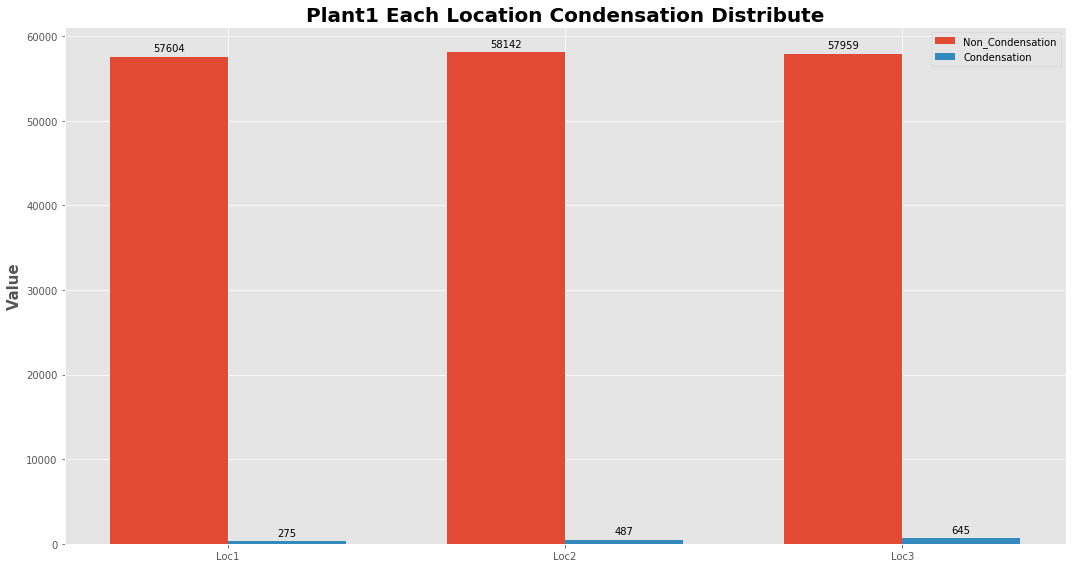

In [31]:
cond = [pt1['plant1_train.cond_loc1'].value_counts()[0],pt1['plant1_train.cond_loc2'].value_counts()[0],pt1['plant1_train.cond_loc3'].value_counts()[0]]
cond2 = [pt1['plant1_train.cond_loc1'].value_counts()[1],pt1['plant1_train.cond_loc2'].value_counts()[1],pt1['plant1_train.cond_loc3'].value_counts()[1]]

labels = ['Loc1','Loc2','Loc3']
non_cond = cond
real_cond = cond2

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,8))
rects1 = ax.bar(x - width/2, non_cond, width, label='Non_Condensation')
rects2 = ax.bar(x + width/2, real_cond, width, label='Condensation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value',fontweight = 'bold',fontsize = 15)
ax.set_title('Plant1 Each Location Condensation Distribute',fontweight = 'bold',fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


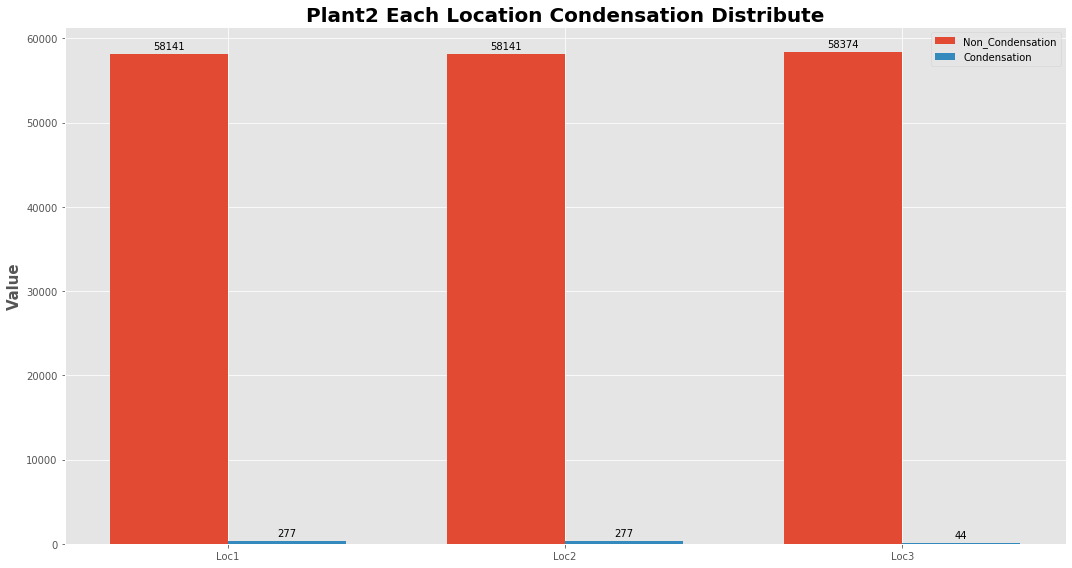

In [28]:
cond = [pt2['plant2_train.cond_loc1'].value_counts()[0],pt2['plant2_train.cond_loc2'].value_counts()[0],pt2['plant2_train.cond_loc3'].value_counts()[0]]
cond2 = [pt2['plant2_train.cond_loc1'].value_counts()[1],pt2['plant2_train.cond_loc2'].value_counts()[1],pt2['plant2_train.cond_loc3'].value_counts()[1]]

labels = ['Loc1','Loc2','Loc3']
non_cond = cond
real_cond = cond2

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,8))
rects1 = ax.bar(x - width/2, non_cond, width, label='Non_Condensation')
rects2 = ax.bar(x + width/2, real_cond, width, label='Condensation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value',fontweight = 'bold',fontsize = 15)
ax.set_title('Plant2 Each Location Condensation Distribute',fontweight = 'bold',fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


# 시간 차이 확인

In [4]:
date_ls = []
for i in range(len(pt1)):
    date0 = re.sub('[\"]','',pt1['plant1_train.mea_ddhr'].iloc[i])
    
    date_ls.append(datetime.strptime(date0,'%Y-%m-%d %H:%M'))
    
pt1['date'] = date_ls

In [ ]:
pt1['time_interval'] = pt1['date'] - pt1['date_lag']
pt1.drop(columns = 'time_inteval',inplace = True)

In [ ]:
pt1['time_interval'].astype('str').unique()

In [102]:
pt1['time_interval'].astype('str').value_counts()

0 days 00:10:00.000000000    42040
0 days 01:00:00.000000000    10575
0 days 00:30:00.000000000     3936
0 days 03:00:00.000000000     2182
0 days 02:00:00.000000000        5
0 days 07:00:00.000000000        4
0 days 01:20:00.000000000        1
3 days 12:00:00.000000000        1
0 days 23:50:00.000000000        1
NaT                              1
0 days 12:00:00.000000000        1
0 days 09:00:00.000000000        1
0 days 16:00:00.000000000        1
Name: time_interval, dtype: int64

In [ ]:
date_ls = []
for i in range(len(pt2)):
    date0 = re.sub('[\"]','',pt2['plant2_train.mea_ddhr'].iloc[i])
    
    date_ls.append(datetime.strptime(date0,'%Y-%m-%d %H:%M'))
    
pt2['date'] = date_ls
pt2['date_lag'] = pt2['date'].shift(1)

pt2['time_interval'] =pt2['date'] - pt2['date_lag']


In [41]:
pt2['time_interval'].astype('str').unique()

array(['NaT', '0 days 03:00:00.000000000', '0 days 09:00:00.000000000',
       '3 days 12:00:00.000000000', '0 days 12:00:00.000000000',
       '0 days 01:00:00.000000000', '0 days 07:00:00.000000000',
       '0 days 02:00:00.000000000', '0 days 16:00:00.000000000',
       '0 days 00:30:00.000000000', '0 days 00:10:00.000000000',
       '0 days 01:20:00.000000000', '0 days 23:50:00.000000000'],
      dtype=object)

In [103]:
pt2['time_interval'].astype('str').value_counts()

0 days 00:10:00.000000000    42040
0 days 01:00:00.000000000    10640
0 days 00:30:00.000000000     3936
0 days 03:00:00.000000000     2161
0 days 07:00:00.000000000        4
0 days 02:00:00.000000000        4
0 days 01:20:00.000000000        1
3 days 12:00:00.000000000        1
0 days 23:50:00.000000000        1
NaT                              1
0 days 12:00:00.000000000        1
0 days 09:00:00.000000000        1
0 days 16:00:00.000000000        1
Name: time_interval, dtype: int64

# 결로현상의 정의와 실제 결로현상 여부와의 정합성 여부 체크

In [45]:
pt1[pt1['plant1_train.cond_loc3']==1]['plant1_train.cond_loc2'].value_counts(dropna = False)

1.0    475
0.0    170
Name: plant1_train.cond_loc2, dtype: int64

In [46]:
pt1[pt1['plant1_train.cond_loc3']==1]['plant1_train.cond_loc1'].value_counts(dropna = False)

0.0    364
1.0    264
NaN     17
Name: plant1_train.cond_loc1, dtype: int64

- plant1에서는 locaton3에서 결로현상이 많이 나타나는 것으로 보이는데 loc1 혹은 loc2가 결로라고 예측할 때 Loc3에서 결로현상이 나타날 경우가 96~97% 임
- 후에 예측했을 때 해당 인사이트가 맞는지 검증해볼 필요가 있음

In [50]:
pt2[pt2['plant2_train.cond_loc1']==1]['plant2_train.cond_loc2'].value_counts(dropna = False)

1.0    223
0.0     54
Name: plant2_train.cond_loc2, dtype: int64

In [51]:
pt2[pt2['plant2_train.cond_loc2']==1]['plant2_train.cond_loc1'].value_counts(dropna = False)

1.0    223
0.0     54
Name: plant2_train.cond_loc1, dtype: int64

- plant2는 Plant1만큼은 아니지만 loc1과 Loc2의 관계가 80%이상임

In [53]:
pt2[pt2['plant2_train.cond_loc2']==1]['plant2_train.cond_loc3'].value_counts(dropna = False)

0.0    243
1.0     34
Name: plant2_train.cond_loc3, dtype: int64

- loc3와는 뚜렷한 패턴은 안보이지만 1과 2에 대해서 약 70%이상 결로현상 패턴이 비슷하게 나타남

    1. 습한공기가 접촉하는 구조물의 표면온도가 공기온도보다 30% 낮을 때 공기중의 수증기가 표면에 부딪히면서 이슬이 발생하는 현상
        - ex) 외부 기온 30 / 구조물 온도 21일 때
    2. 실내외 기온차가 클 경우 발생가능
    3. 실내온도가 낮고 상대 습도가 높은 경우 발생

#### 결로현상이 나타나는 경우와 나타나지 않는 경우의 코일 표면온도 / 공기온도 차이의 비율

In [15]:
def coil_air_temperature_ratio(df, variable, plant, location):
    df2 = df.dropna()
    
    df2_cs = df2[df2[variable] == 1]
    df2_non_cs = df2[df2[variable] != 1]
    
    cs_tem_interval = ((df2_cs[plant+'_train.tem_in_'+location] - df2_cs[plant+'_train.tem_coil_'+location]) / df2_cs[plant+'_train.tem_in_'+location]).mean() *100.0
    non_cs_tem_interval = ((df2_non_cs[plant+'_train.tem_in_'+location] - df2_non_cs[plant+'_train.tem_coil_'+location]) / df2_non_cs[plant+'_train.tem_in_'+location]).mean() * 100.0
    
    
    key_ls = ['condensation','Non_condensation']
    value_ls = [cs_tem_interval,non_cs_tem_interval]
    
    plt.figure(figsize = (10,8))
    barlist = plt.bar(key_ls,value_ls)
    barlist[0].set_color('r')
    barlist[1].set_color('b')
    plt.title('Whether Cond coil, inner temperature ratio interval')
    plt.show()

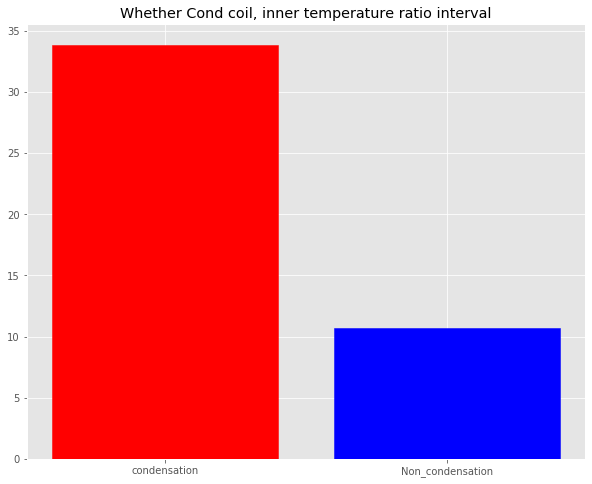

In [16]:
coil_air_temperature_ratio(pt1,'plant1_train.cond_loc3','plant1','loc3')

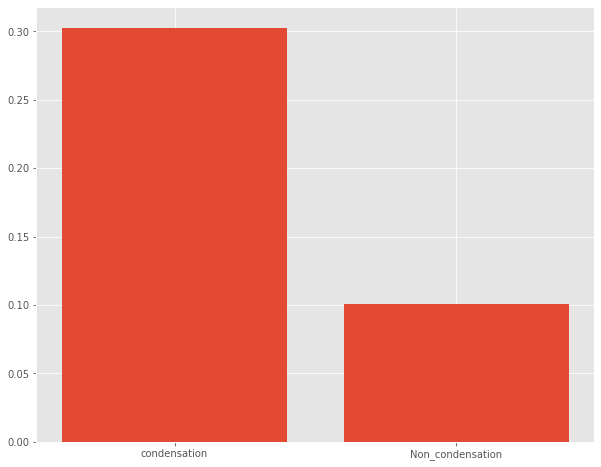

In [83]:
coil_air_temperature_ratio(pt1,'plant1_train.cond_loc2','plant1','loc2')

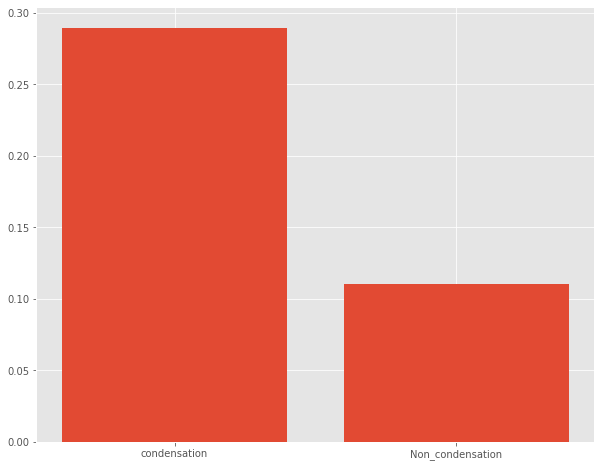

In [84]:
coil_air_temperature_ratio(pt1,'plant1_train.cond_loc1','plant1','loc1')

- 실제로 결로현상 정의인 30%에 부합한 경우가 많이 있지는 않음
    - 부합하지 않은 경우 특정 날씨 패턴이던, 특정 시간대가 있는지 확인해보자
- 그럼 결로 현상이 나타나는 경우 실제로 표면 온도와 공기온도가 몇%차이를 보일까?

- 실제로 결로현상이 나타나는 경우와 나타나지 않는 경우에 코일 표면온도, 공기 온도에 차이가 뚜렷함

#### 결로현상 유무별 내외부 온도차이

In [88]:
abs(pd.Series([1,-1,4,-2]))

0    1
1    1
2    4
3    2
dtype: int64

In [89]:
def air_inout_temperature_interval(df, variable, plant, location):
    df2 = df.dropna()
    
    df2_cs = df2[df2[variable] == 1]
    df2_non_cs = df2[df2[variable] != 1]
    
    cs_tem_interval = abs(df2_cs[plant+'_train.tem_in_'+location] - df2_cs['plant1_train.tem_out_loc1']).mean()
    non_cs_tem_interval = abs(df2_non_cs[plant+'_train.tem_in_'+location] - df2_non_cs['plant1_train.tem_out_loc1']).mean()
    
    
    key_ls = ['condensation','Non_condensation']
    value_ls = [cs_tem_interval,non_cs_tem_interval]
    
    plt.figure(figsize = (10,8))
    plt.bar(key_ls,value_ls)
    plt.show()

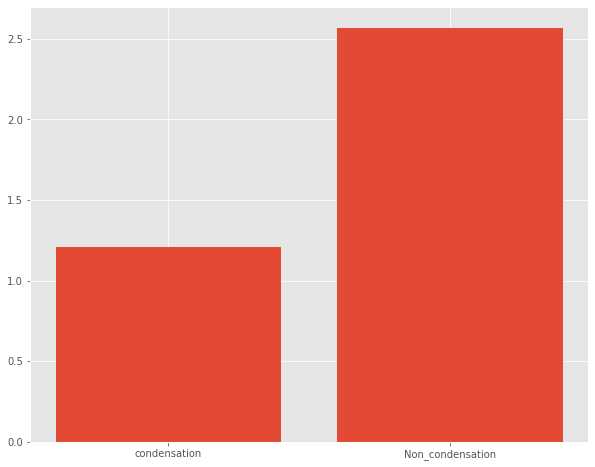

In [90]:
air_inout_temperature_interval(pt1,'plant1_train.cond_loc3','plant1','loc3')

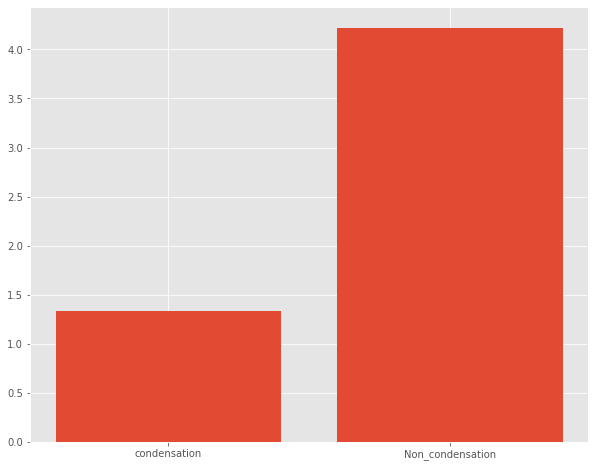

In [91]:
air_inout_temperature_interval(pt1,'plant1_train.cond_loc1','plant1','loc1')

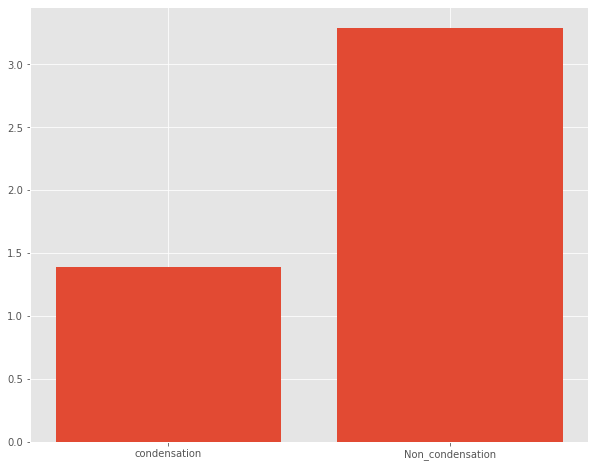

In [92]:
air_inout_temperature_interval(pt1,'plant1_train.cond_loc2','plant1','loc2')

- 결로현상이 나타나지 않는 경우 내외부 온도차이가 평균적으로 큼

#### 실내온도 / 실내 상대습도 산점도

In [14]:
def air_humid_temperature_scatter(df, variable, plant, location):
    df2 = df.dropna()
    
    df2_cs = df2[df2[variable] == 1]
    df2_non_cs = df2[df2[variable] != 1]
    
    plt.figure(figsize = (10,8))
    plt.scatter(df2_cs[plant+'_train.tem_in_'+location],df2_cs[plant+'_train.hum_in_'+location],alpha = 1,label = 'Condensation')
    plt.scatter(df2_non_cs[plant+'_train.tem_in_'+location],df2_non_cs[plant+'_train.hum_in_'+location],alpha = 0.1,label = 'Non_Condensation')
    plt.xlabel('Temperature')
    plt.ylabel('Humid')
    plt.legend()
    plt.show()

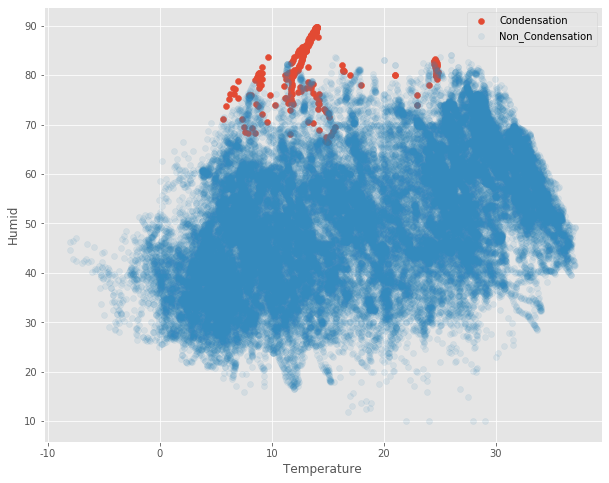

In [15]:
air_humid_temperature_scatter(pt1,'plant1_train.cond_loc1','plant1','loc1')

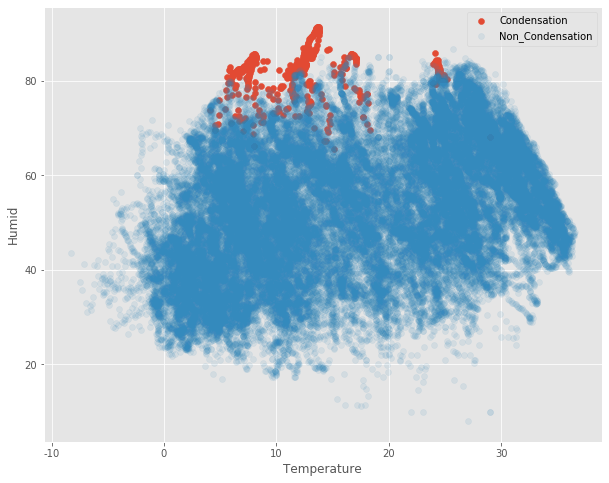

In [16]:
air_humid_temperature_scatter(pt1,'plant1_train.cond_loc2','plant1','loc2')

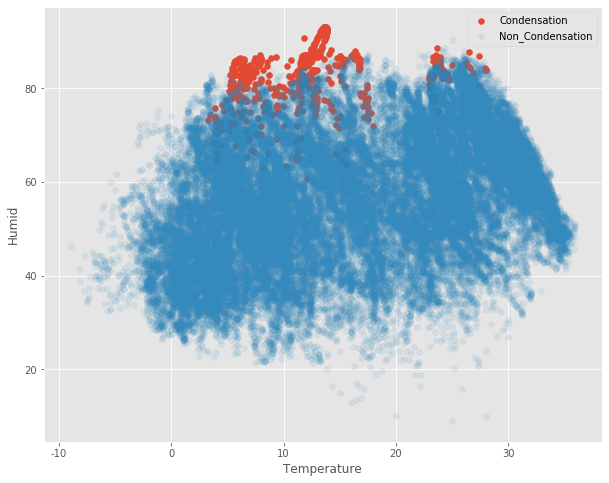

In [17]:
air_humid_temperature_scatter(pt1,'plant1_train.cond_loc3','plant1','loc3')

- 온도는 평균적으로 5도 ~ 15도 사이
- 습도는 확실히 높은 상태에서 결로현상이 두드러짐

# 각 컬럼별 분포도 그리기

In [ ]:
figure, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

sns.distplot(df2_cs[variable], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1}, ax=ax1)

sns.distplot(df2_non_cs[variable], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1}, ax = ax1)

sns.distplot(df2_cs[variable], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1}, label = 'condensation',ax=ax2)
sns.distplot(df2_non_cs[variable], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 1}, label = 'Non_condensation',ax=ax2)

In [23]:
def each_variable_distribution(df,label_column, variable):
    
    try:
        df2 = df.dropna()

        df2_cs = df2[df2[label_column] == 1]
        df2_non_cs = df2[df2[label_column] != 1]

        figure, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2)
        figure.set_size_inches(15,8)

        sns.distplot(df2_cs[variable], hist=True, kde=True, 
                     bins=int(180/5), color = 'blue', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 1}, ax=ax1)

        sns.distplot(df2_non_cs[variable], hist=True, kde=True, 
                     bins=int(180/5), color = 'red', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 1}, ax = ax1)

        sns.distplot(df2_cs[variable], hist = False, kde = True,
                         kde_kws = {'shade': True, 'linewidth': 1}, label = 'condensation',ax=ax2)
        sns.distplot(df2_non_cs[variable], hist = False, kde = True,
                         kde_kws = {'shade': True, 'linewidth': 1}, label = 'Non_condensation',ax=ax2)

        ax1.set_title(variable +'  Bar distribution')
        ax2.set_title(variable + '  Line distribution')
    except:
        pass

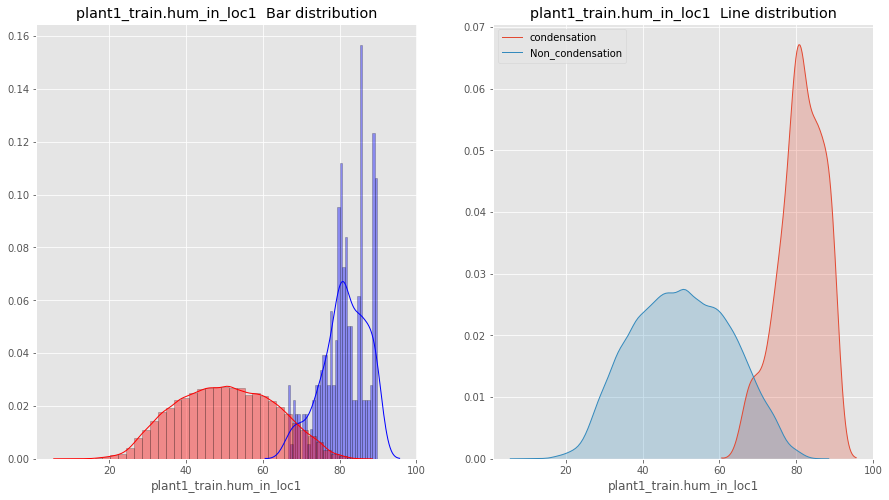

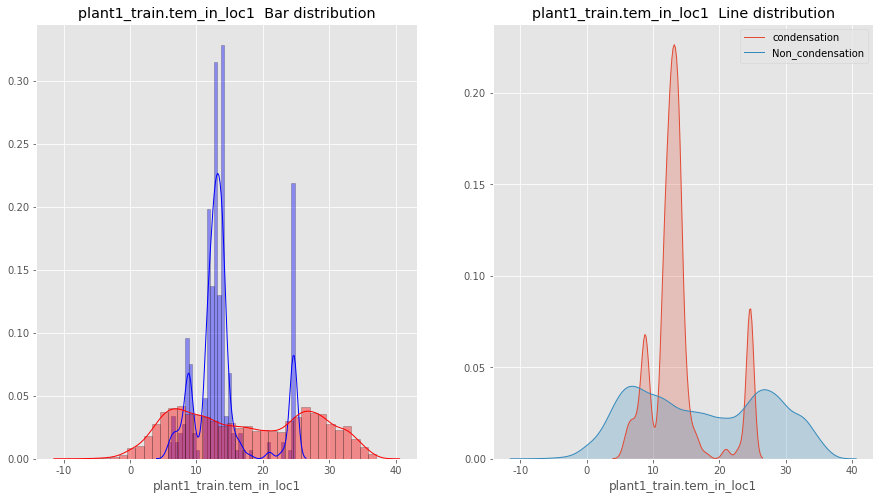

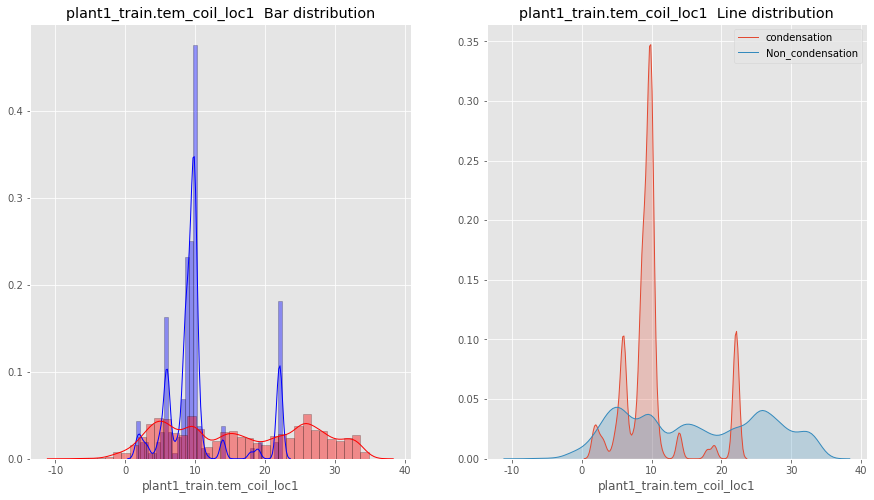

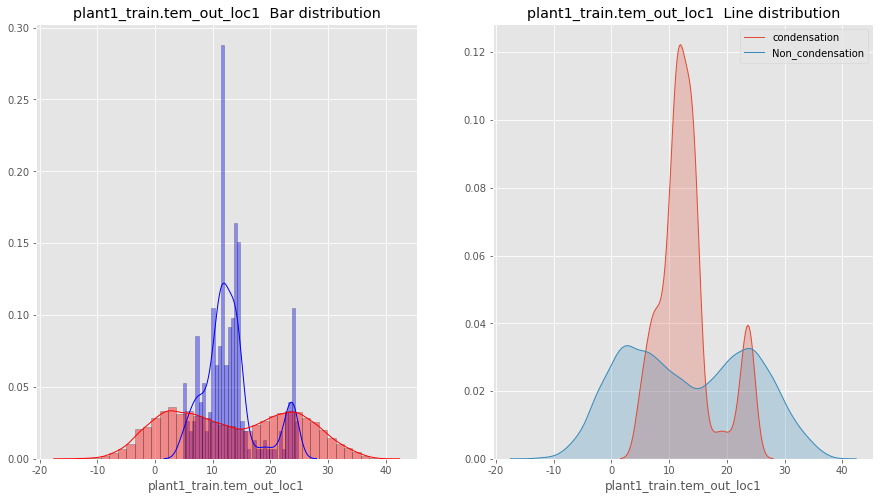

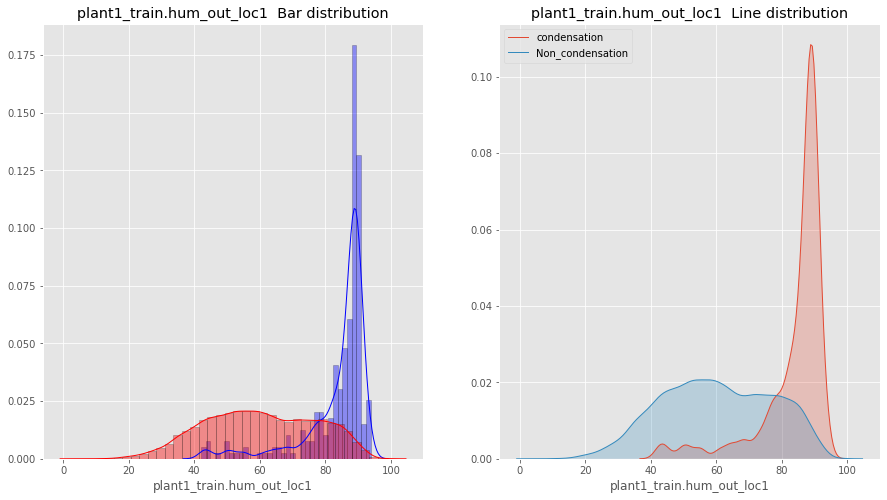

In [134]:
loc_num = '1'
for i in ['plant1_train.hum_in_loc','plant1_train.tem_in_loc','plant1_train.tem_coil_loc','plant1_train.tem_out_loc','plant1_train.hum_out_loc']:
    each_variable_distribution(pt1,'plant1_train.cond_loc'+loc_num,i+loc_num)

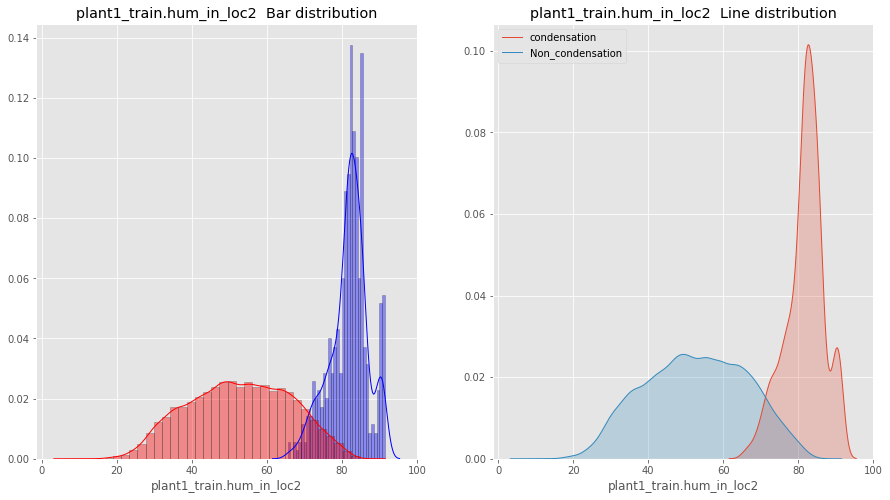

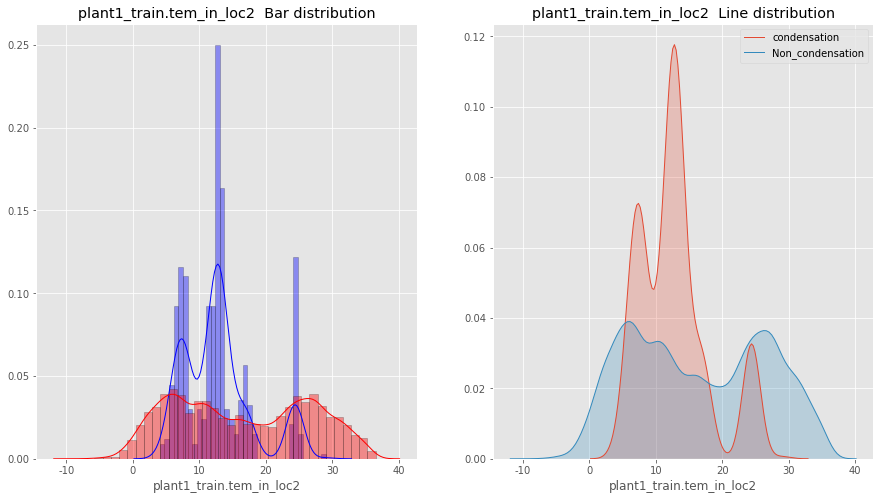

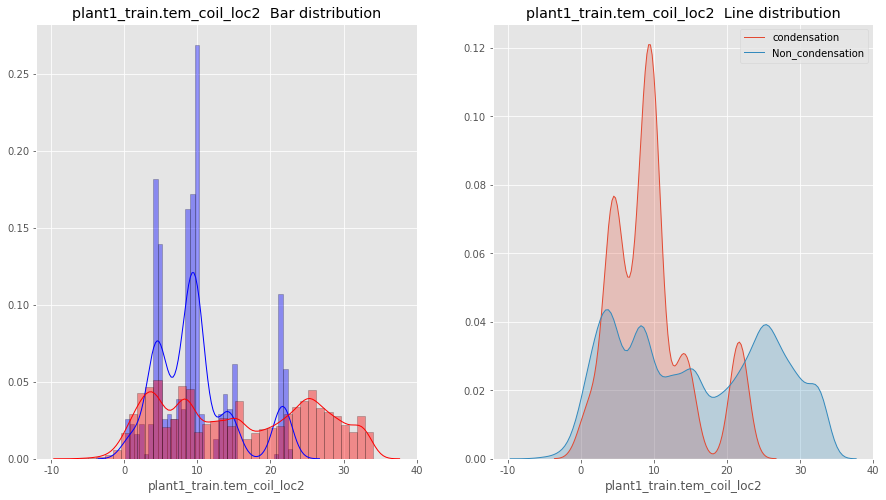

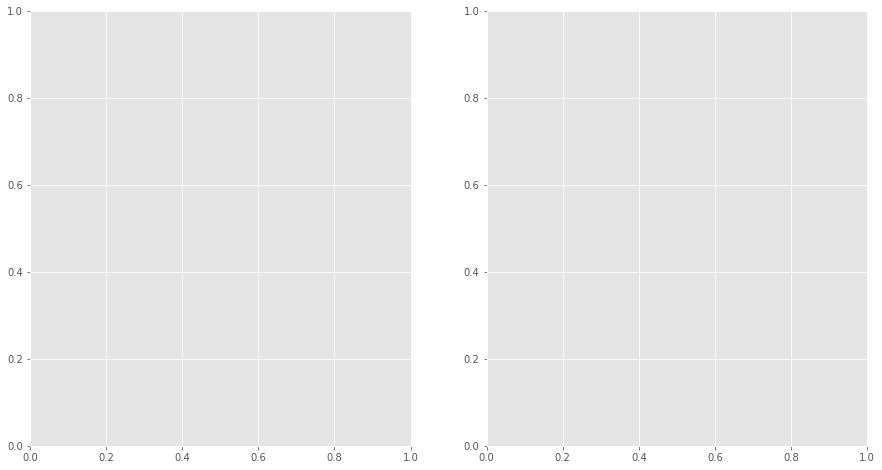

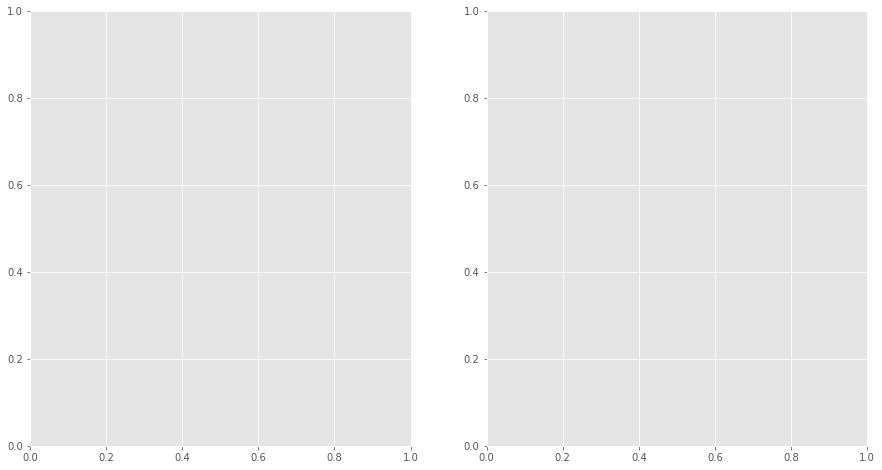

In [135]:
loc_num = '2'
for i in ['plant1_train.hum_in_loc','plant1_train.tem_in_loc','plant1_train.tem_coil_loc','plant1_train.tem_out_loc','plant1_train.hum_out_loc']:
    each_variable_distribution(pt1,'plant1_train.cond_loc'+loc_num,i+loc_num)


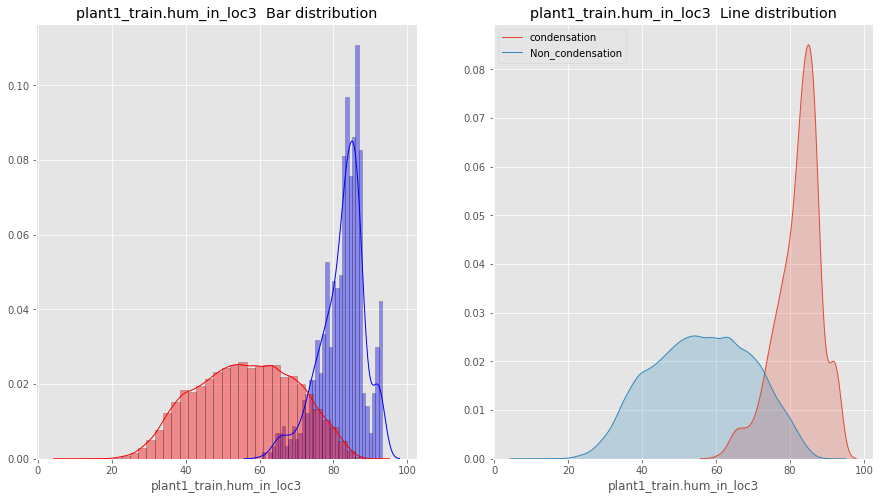

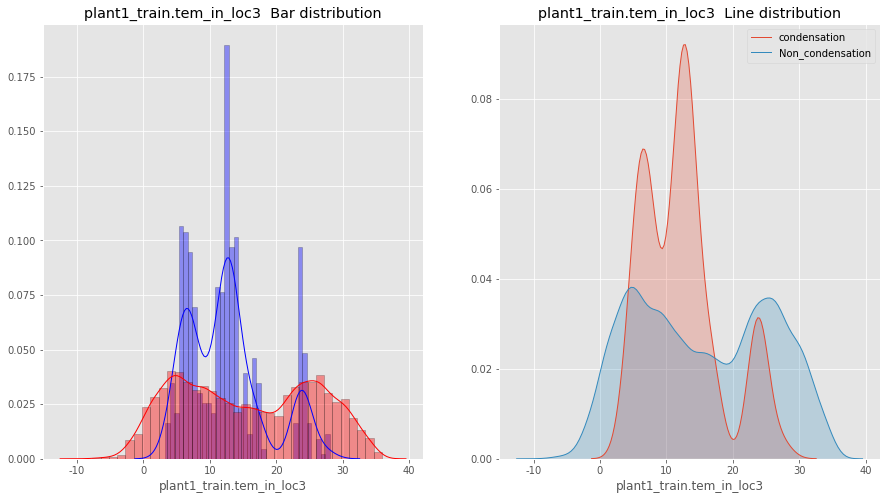

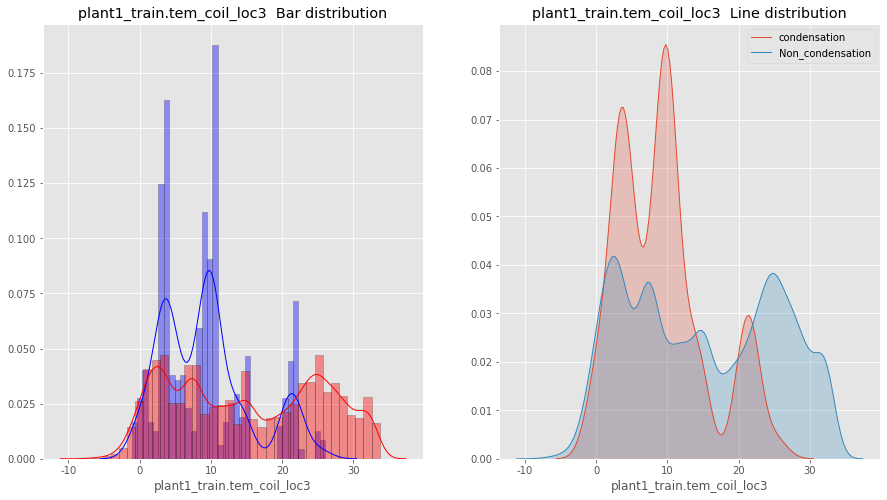

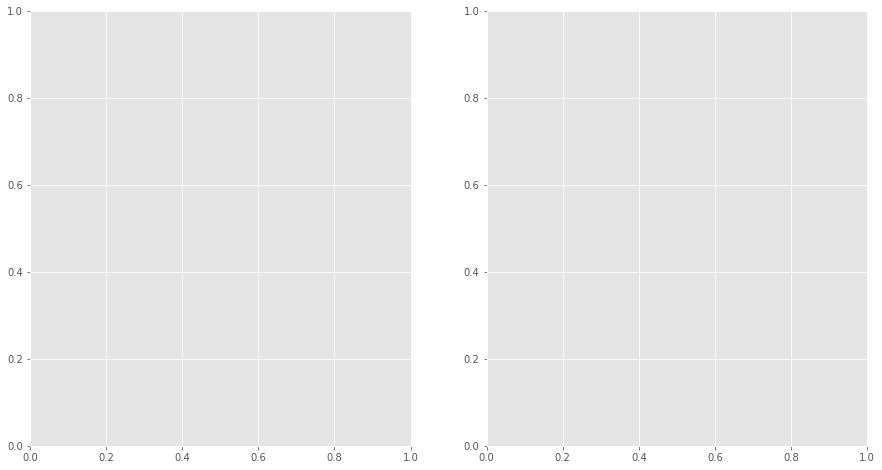

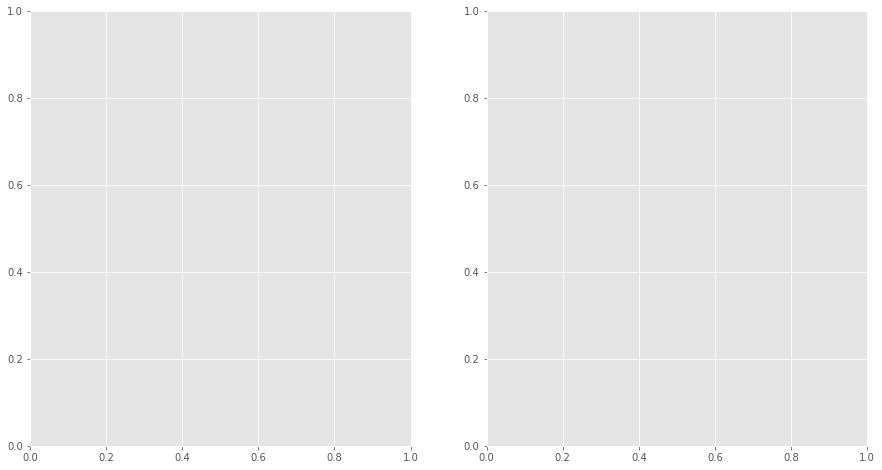

In [136]:
loc_num = '3'
for i in ['plant1_train.hum_in_loc','plant1_train.tem_in_loc','plant1_train.tem_coil_loc','plant1_train.tem_out_loc','plant1_train.hum_out_loc']:
    each_variable_distribution(pt1,'plant1_train.cond_loc'+loc_num,i+loc_num)


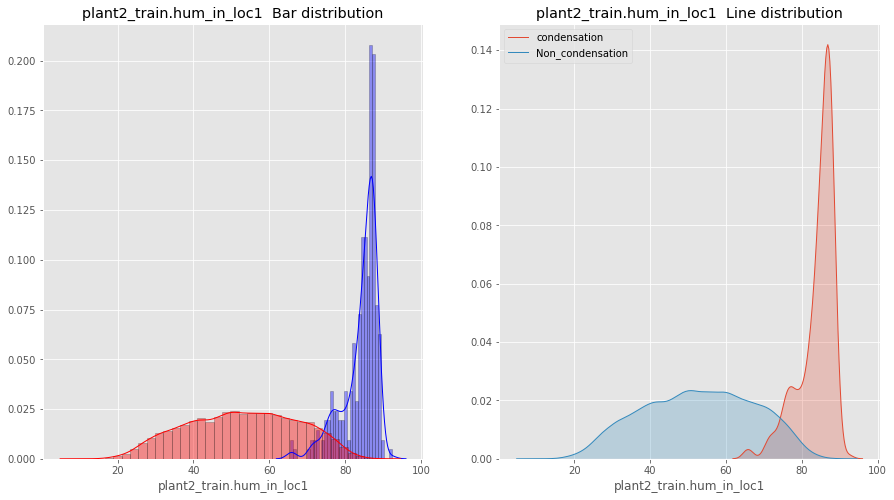

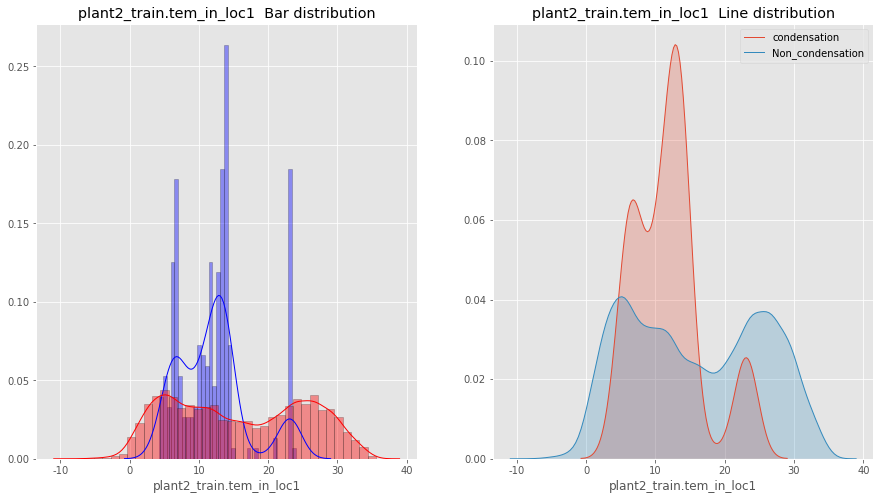

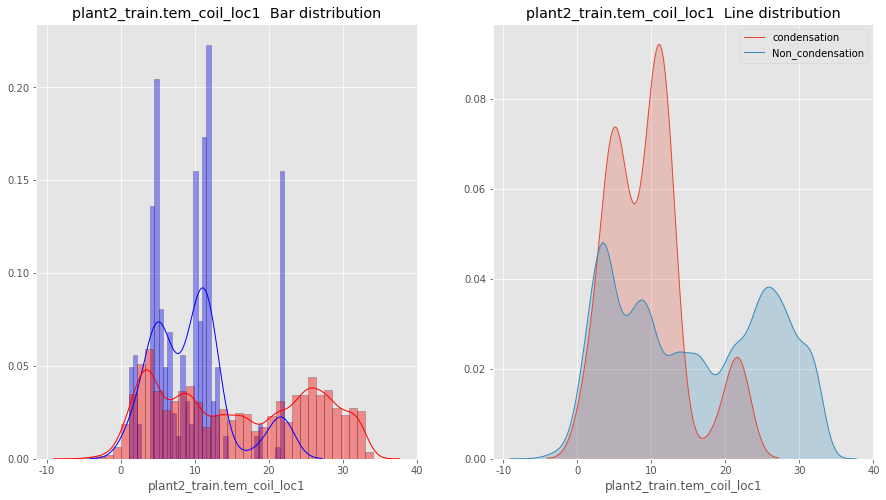

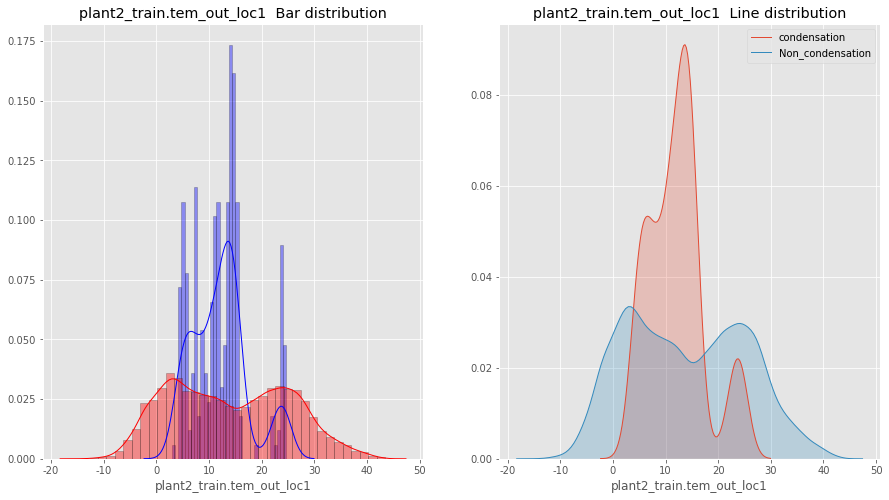

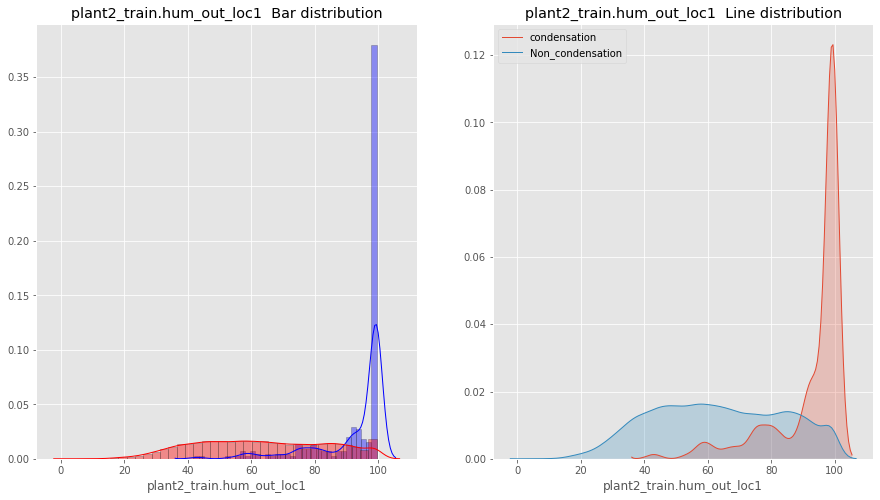

In [138]:
loc_num = '1'
for i in ['plant2_train.hum_in_loc','plant2_train.tem_in_loc','plant2_train.tem_coil_loc','plant2_train.tem_out_loc','plant2_train.hum_out_loc']:
    each_variable_distribution(pt2,'plant2_train.cond_loc'+loc_num,i+loc_num)

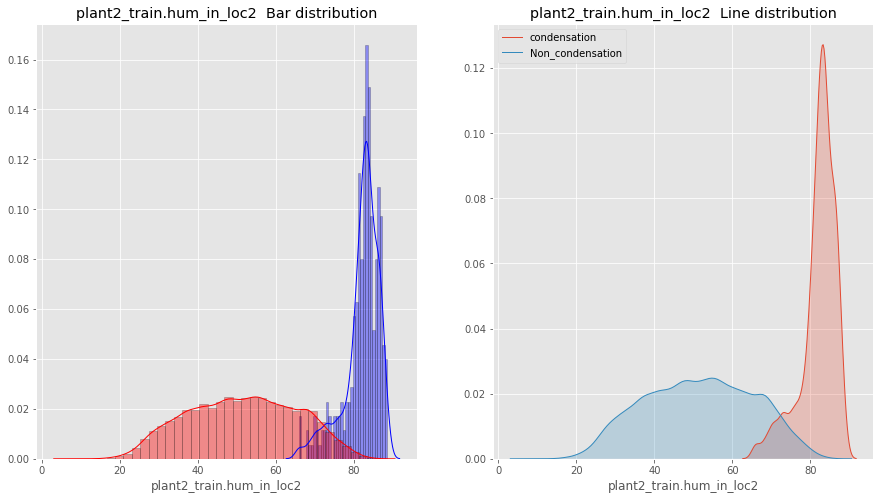

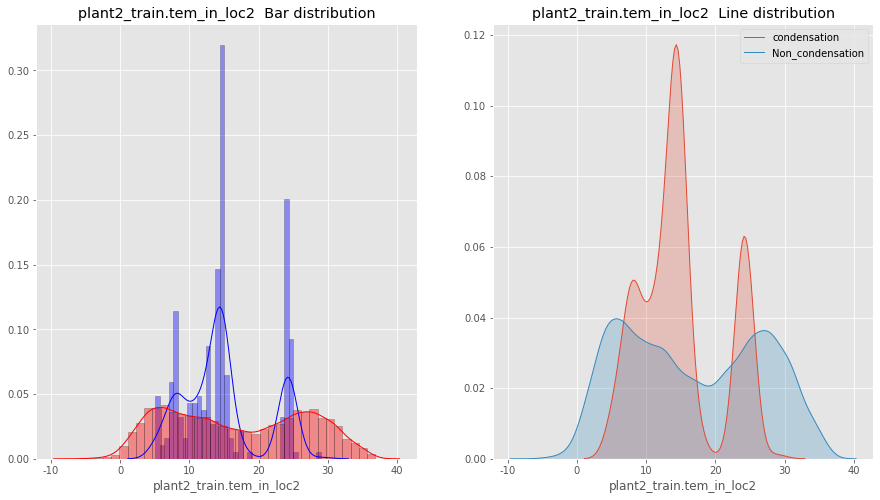

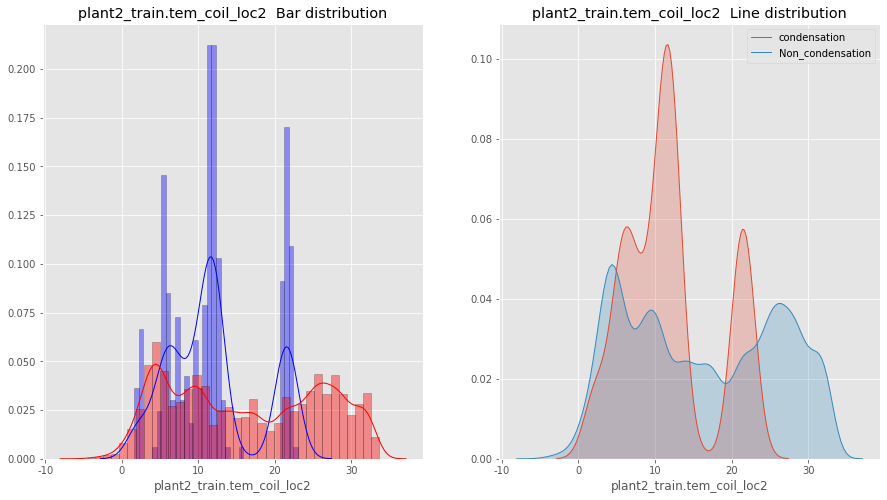

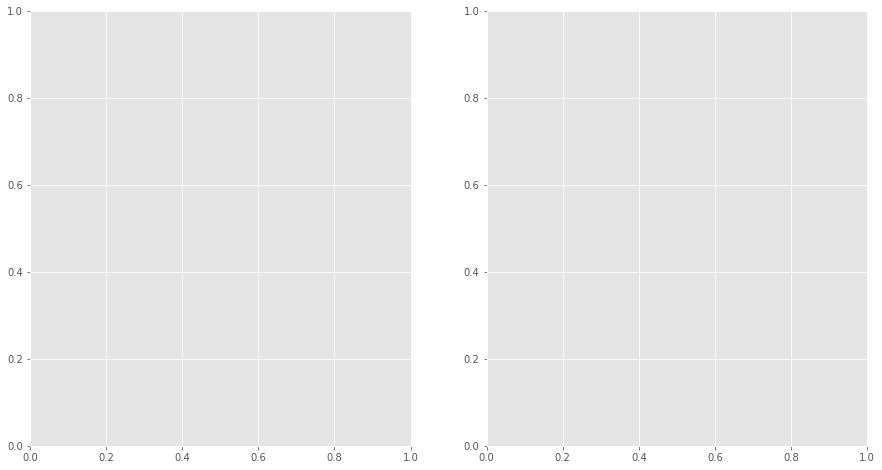

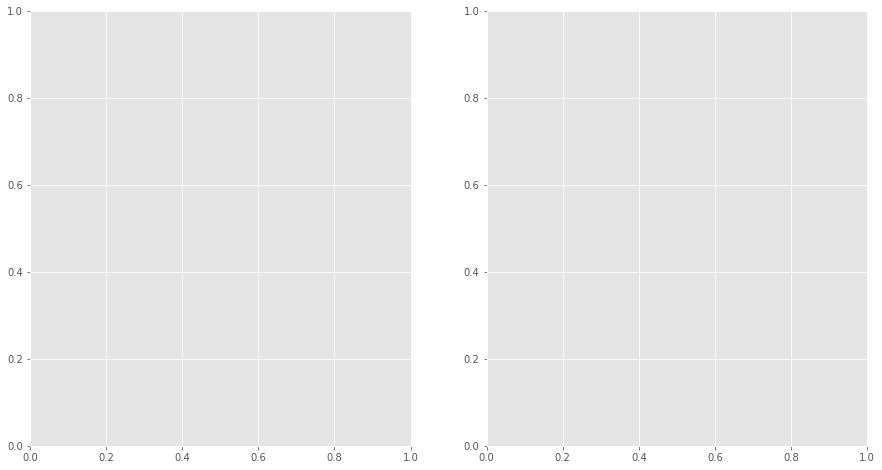

In [139]:
loc_num = '2'
for i in ['plant2_train.hum_in_loc','plant2_train.tem_in_loc','plant2_train.tem_coil_loc','plant2_train.tem_out_loc','plant2_train.hum_out_loc']:
    each_variable_distribution(pt2,'plant2_train.cond_loc'+loc_num,i+loc_num)

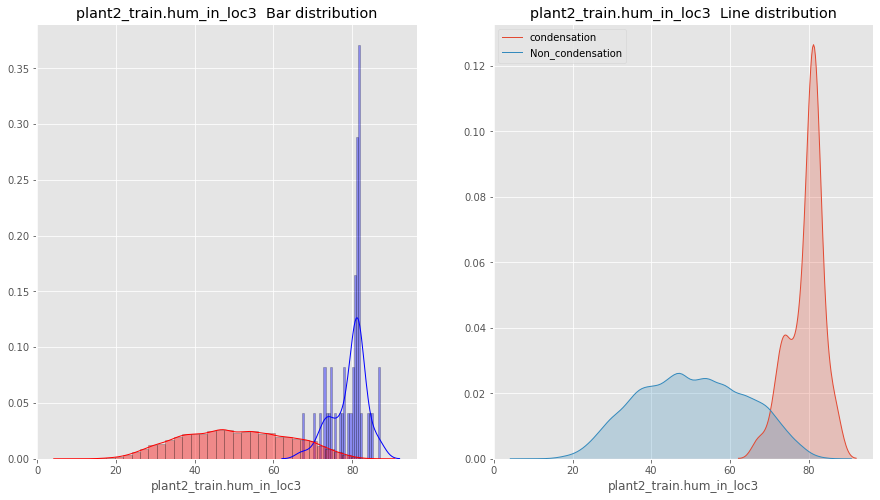

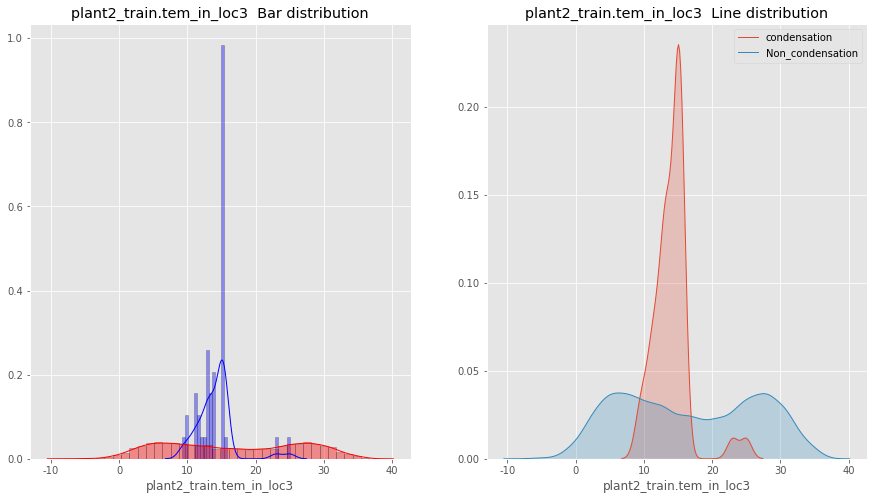

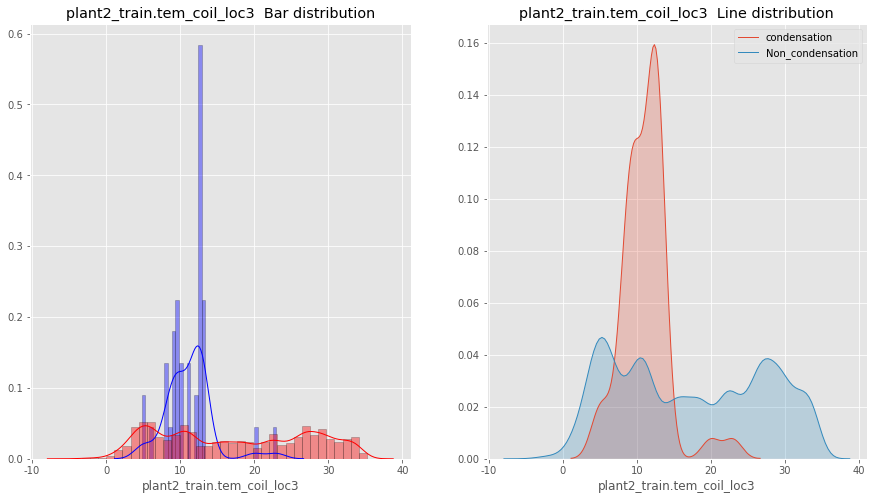

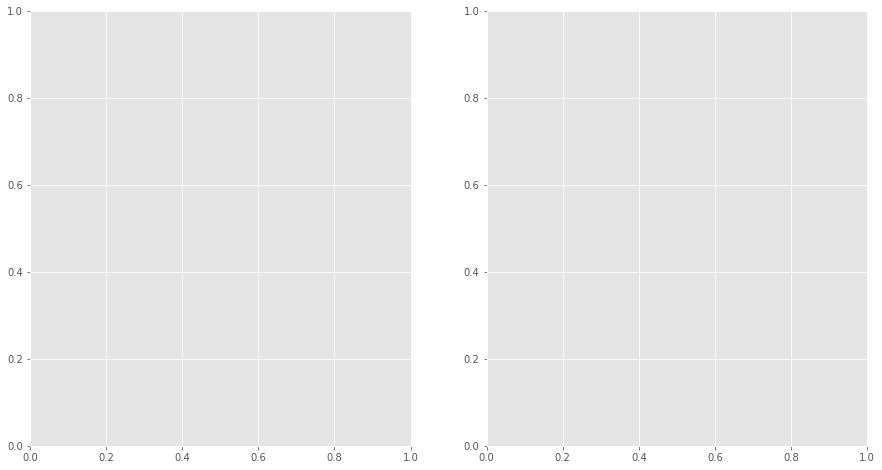

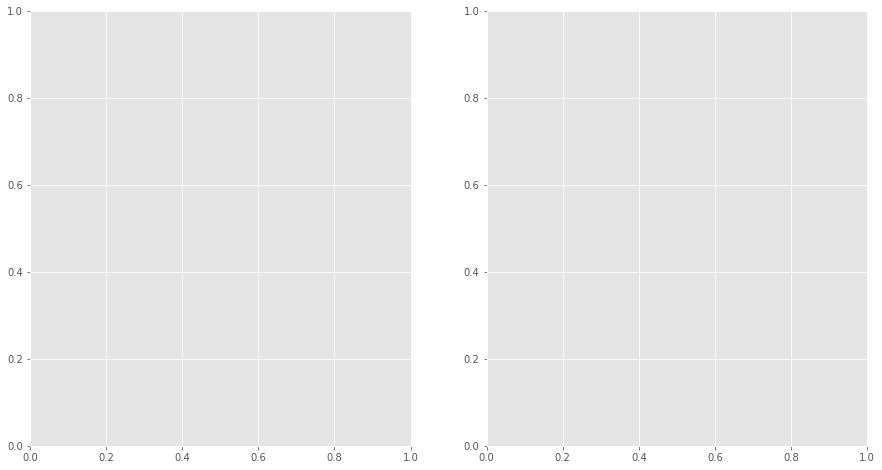

In [140]:
loc_num = '3'
for i in ['plant2_train.hum_in_loc','plant2_train.tem_in_loc','plant2_train.tem_coil_loc','plant2_train.tem_out_loc','plant2_train.hum_out_loc']:
    each_variable_distribution(pt2,'plant2_train.cond_loc'+loc_num,i+loc_num)

- 나중에 변수를 조합해서 점수식으로 만들어서 분포도글 그려도 될 듯

# 결측치 처리는 추후에 작업할 예정

# 데이터를 24시간, 48시간 뒤를 예측할 수 있도록 구축

In [11]:
pt1 = pd.read_csv('plant1_train_version1.csv').drop(columns = 'Unnamed: 0' )
pt2 = pd.read_csv('plant2_train_version1.csv').drop(columns = 'Unnamed: 0' )
pt_test = pd.read_csv('plant_test_version1.csv').drop(columns = 'Unnamed: 0' )

In [12]:
def datetime_convert(df,variance):
    date_ls = []
    for i in range(len(df)):
        date0 = df[variance].iloc[i]

        date_ls.append(datetime.strptime(date0,'%Y-%m-%d %H:%M'))
        
    return date_ls


In [15]:
pt1['date'] = datetime_convert(pt1,'plant1_train.mea_ddhr')
pt1['date_shift1'] = pt1['date'].shift(1)

pt2['date'] = datetime_convert(pt2,'plant2_train.mea_ddhr')
pt2['date_shift1'] = pt2['date'].shift(1)

In [227]:
pt1['datetime_interval'] = pt1['date'] - pt1['date_shift1']
pt2['datetime_interval'] = pt2['date'] - pt2['date_shift1']

### 24시간 단위 예측으로 바꾸기

In [174]:
pt1['datetime_interval'].value_counts()

0 days 00:10:00    42040
0 days 01:00:00    10575
0 days 00:30:00     3936
0 days 03:00:00     2182
0 days 02:00:00        5
0 days 07:00:00        4
0 days 23:50:00        1
0 days 09:00:00        1
0 days 12:00:00        1
0 days 01:20:00        1
0 days 16:00:00        1
3 days 12:00:00        1
Name: datetime_interval, dtype: int64

In [197]:
minute_flow = []
for i in range(1,len(pt1)):
    
    minute0 = pt1['datetime_interval'].iloc[i].seconds/60
    
    minute_flow.append(minute0)

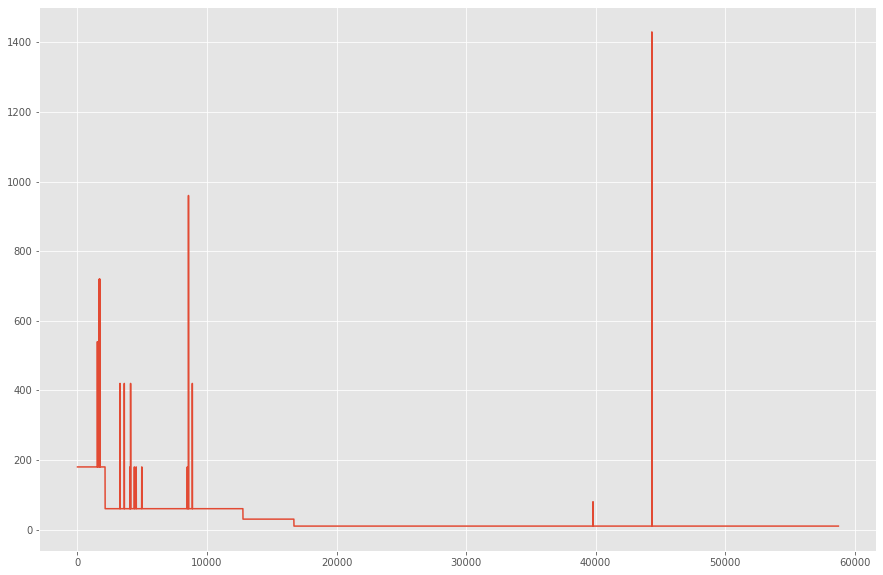

In [199]:
# 시간의 연속적인 흐름 확인
plt.figure(figsize = (15,10))
plt.plot(list(range(0,len(pt1)-1)),minute_flow)